In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 


In [17]:
data = pd.read_csv("Tsla-stock-price\TSLA.CSV" , index_col="Date"  , usecols=['Close', 'Date'], parse_dates=True)

# Moving Average and Differencing in Time Series Analysis

Time series analysis often involves preprocessing techniques like moving averages and differencing to understand and model data patterns. Let's explore these concepts with formulas and examples.

## Moving Average (MA)

### Purpose:
- Smoothing time series data to identify trends and patterns.
- Reducing noise to highlight underlying information.

**Formula:**
The Simple Moving Average (SMA) of a time series is calculated as:

$$
SMA_t = \frac{X_{t-1} + X_t + X_{t+1} + \ldots + X_{t-n}}{n}
$$

Where:
- $SMA_t$ is the moving average at time $t$.
- $X_t$ represents the value at time $t$.
- $n$ is the number of data points in the moving window.

### Example:
Consider a small dataset of daily temperatures:

$$
\begin{array}{|c|c|}
\hline
\text{Day} & \text{Temperature (°C)} \\
\hline
1 & 20 \\
2 & 22 \\
3 & 25 \\
4 & 24 \\
5 & 21 \\
\hline
\end{array}
$$

**Calculation of 3-Day Moving Average (SMA) for Day 3:**

To calculate the 3-day Simple Moving Average (SMA) for Day 3, we use the following formula:

$$
SMA_3 = \frac{22 + 25 + 24}{3} = \frac{71}{3} = 23.67
$$

Where:
- $SMA_3$ represents the moving average at Day 3.
- We sum the temperatures of the three previous days (Day 1, Day 2, and Day 3) and divide by 3, which is the size of our moving window.
- The result, 23.67 degrees Celsius, is the 3-day SMA for Day 3.

This moving average helps in smoothing the temperature data and provides a more stable representation of the temperature trend over the specified period.

## Differencing

### Purpose:
- Removing trends from time series data to achieve stationarity.
- Eliminating seasonality for analysis and modeling.

**Formula:**
The differenced time series at time $t$ is obtained by subtracting the value at time $t-1$ from the value at time $t$:

$$
Difference_t = X_t - X_{t-1}
$$

### Example:
Using the same temperature dataset as before, let's calculate the differences between consecutive days:

$$
\begin{array}{|c|c|c|}
\hline
\text{Day} & \text{Temperature (°C)} & \text{Difference} \\
\hline
1 & 20 & \text{N/A (No previous day)} \\
2 & 22 & 22 - 20 = 2 \\
3 & 25 & 25 - 22 = 3 \\
4 & 24 & 24 - 25 = -1 \\
5 & 21 & 21 - 24 = -3 \\
\hline
\end{array}
$$

Differencing helps make the data stationary, which is often a requirement for time series modeling.

In summary, moving averages smooth time series data for trend identification, while differencing helps achieve stationarity by removing trends and seasonality. These techniques are fundamental for time series analysis and forecasting.


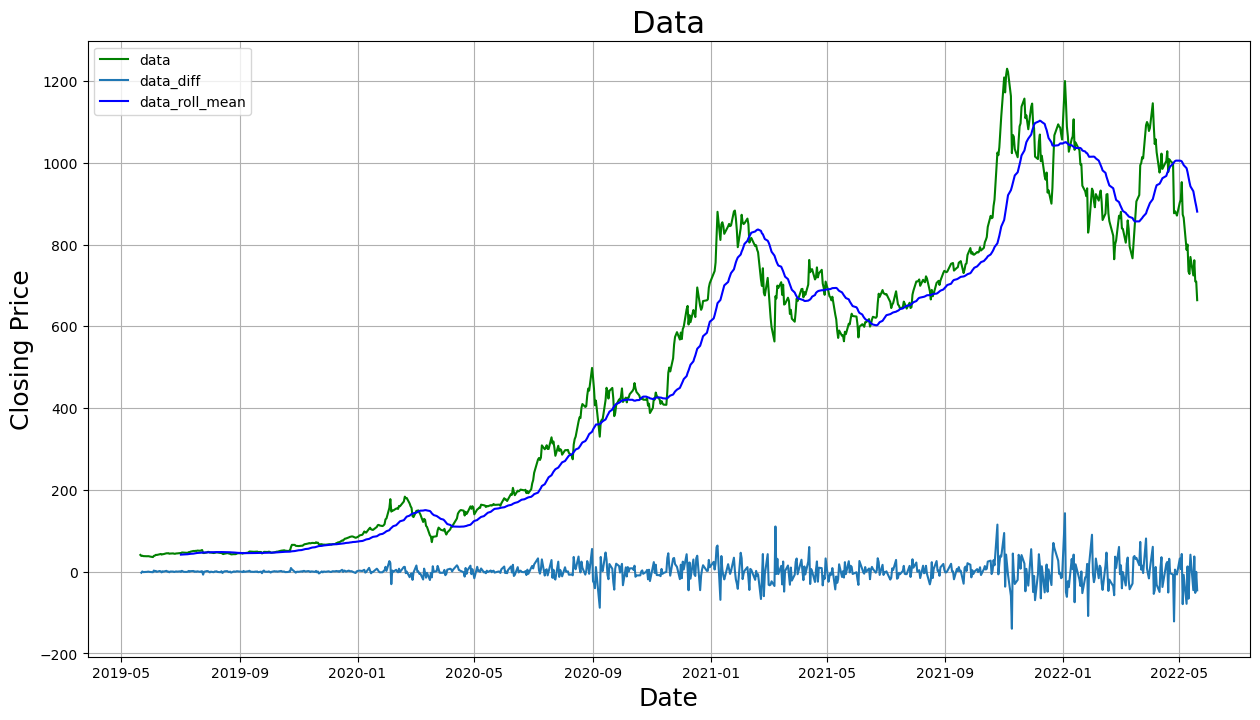

In [60]:
plt.figure(figsize=(15,8))
plt.plot(data , color= "green", label = "data")
plt.plot(data.diff(), label = "data_diff")
plt.plot(data.rolling(window=30).mean(), color = "blue" ,label = "data_roll_mean")
plt.xlabel("Date",fontsize = 18)
plt.ylabel('Closing Price' , fontsize = 18)
plt.legend()
plt.grid(visible=True)
plt.title("Data" , fontsize = 22)
plt.show()

In [26]:
# lets split the data

train_data = data[data.index <= ('2021-09-01')]
test_data = data[data.index > ('2021-09-01')]

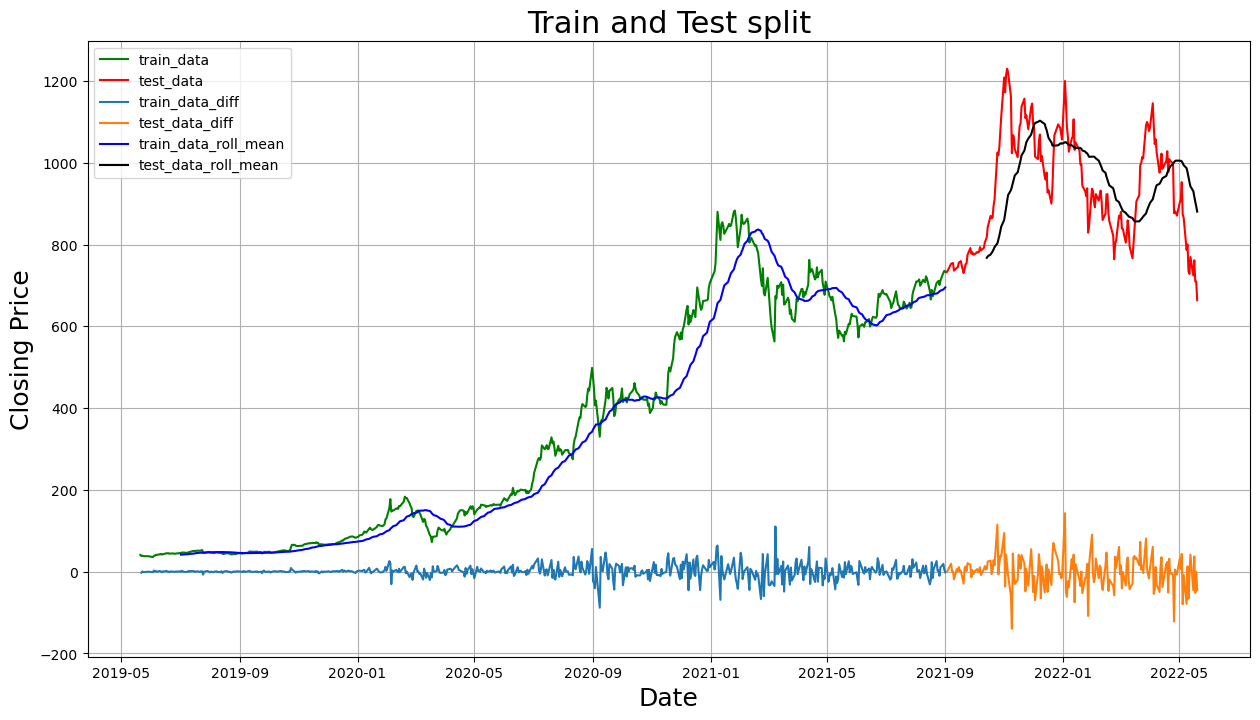

In [59]:
plt.figure(figsize=(15,8))
plt.plot(train_data , color= "green", label = "train_data")
plt.plot(test_data , color = "red" ,label = "test_data")
plt.plot(train_data.diff(), label = "train_data_diff")
plt.plot(test_data.diff(),label = "test_data_diff")
plt.plot(train_data.rolling(window=30).mean(), color = "blue" ,label = "train_data_roll_mean")
plt.plot(test_data.rolling(window=30).mean() ,color = "black" ,label = "test_data_roll_mean")
plt.xlabel("Date",fontsize = 18)
plt.ylabel('Closing Price' , fontsize = 18)
plt.legend()
plt.grid(visible=True)
plt.title("Train and Test split" , fontsize = 22)
plt.show()